# Tuning DNNs (image classification example)

## Libraries

### Import all libraries here:

In [1]:
# Initializing libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

## Data

### Load the dataset:
Use:

1. from keras.datasets import fashion_mnist
2. (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
2. label_names = ['T-shirt/top','Trouser','Pullover' 'Dress','Coat','Sandal','Shirt','Sneaker' ,'Bag','Ankle boot']

In [2]:
# Loading keras dataset fashion_mnist:

from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# Check the labels:
label_names =  np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

label_names

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

In [4]:
# Matching the labels:

label_names[y_test[15]]

'Trouser'

In [5]:
# Check the complete labels on y_test:

label_names[y_test]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [6]:
# Check the ratio between train and test labels:

y_test_names = label_names[y_test]
y_train_names = label_names[y_train]

for name in label_names:
  print('train',name,y_train_names[y_train_names==name].shape)
  print('test',name,y_test_names[y_test_names==name].shape)
  print()

train T-shirt/top (6000,)
test T-shirt/top (1000,)

train Trouser (6000,)
test Trouser (1000,)

train Pullover (6000,)
test Pullover (1000,)

train Dress (6000,)
test Dress (1000,)

train Coat (6000,)
test Coat (1000,)

train Sandal (6000,)
test Sandal (1000,)

train Shirt (6000,)
test Shirt (1000,)

train Sneaker (6000,)
test Sneaker (1000,)

train Bag (6000,)
test Bag (1000,)

train Ankle boot (6000,)
test Ankle boot (1000,)



### Check the dataset:

In [7]:
# Print the shape of the train and test:

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

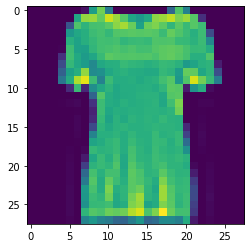

In [8]:
# Plot one image:

plt.imshow(X_train[10])

### Reshape the dataset:

In [9]:
# Reshape the dataset to a one dimensional representation:

n_instances = X_train.shape[0]
n_row = X_train.shape[1]
n_col = X_train.shape[2]

n_instances, n_row, n_col


(60000, 28, 28)

In [10]:
# Reshape the dataset:

X_train = X_train.reshape(n_instances, -1)
n_instances = X_test.shape[0]
X_test = X_test.reshape(n_instances, -1)

In [11]:
# Print the new shape:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

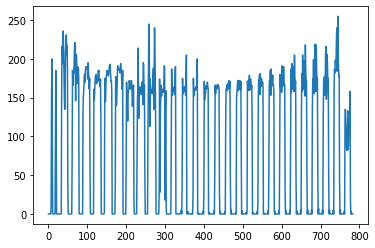

In [12]:
# Plot one instance of the 1-D representation:

plt.plot(X_train[10])

### Plot histograms of the train and test labels:

<function matplotlib.pyplot.show>

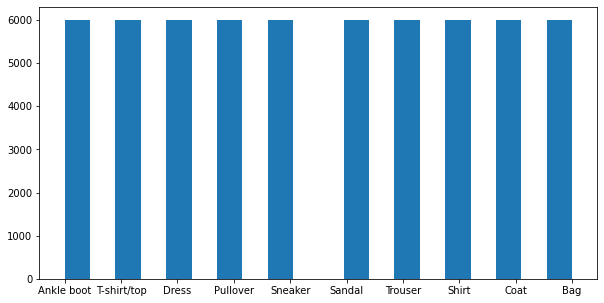

In [13]:
# Histogram representation of y_train:

fig = plt.figure(figsize = (10, 5))
plt.hist(y_train_names, bins = 20)
plt.show

<function matplotlib.pyplot.show>

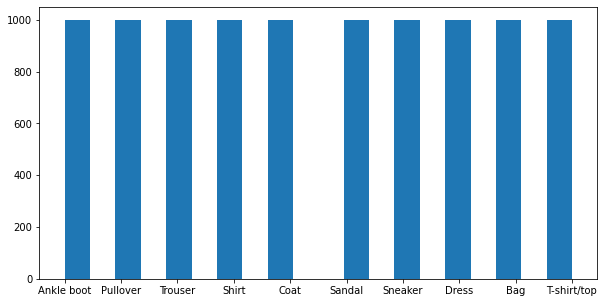

In [14]:
# Histogram representation of y_test:

fig = plt.figure(figsize = (10, 5))
plt.hist(y_test_names, bins = 20)
plt.show

### Perform min-max scaling on the data:

In [15]:
# Perform min max scaling on the data:

# Min-max scaling:
data_min = X_train.min()
data_max = X_train.max()
print(data_min,data_max)
X_train = (X_train - data_min)/(data_max-data_min)
X_test = (X_test - data_min)/(data_max-data_min)
print('after scaling')
data_min = X_train.min()
data_max = X_train.max()
print(data_min,data_max)


0 255
after scaling
0.0 1.0


## Baseline models

### Create 2 baselines models (LogisticRegression and RandomForestClassifier):


In [16]:
# Create 2 baselines models (LogisticRegression and RandomForestClassifier)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Creating Logistic Regression model:
log_reg = LogisticRegression(random_state=42)

# Creating Random Forest model:
rf = RandomForestClassifier(n_jobs = -1)

### Train the baseline models:

In [17]:
# Training the two baseline models:

# Training Logistic Regression model:
print("Training LogReg")
log_reg.fit(X_train,y_train)

# Training Random Forest model:
print("Training RF")
rf.fit(X_train,y_train)

Training LogReg


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training RF


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

### Apply the baseline models on the test data:

In [18]:
# Making prediction with the test set:

# Predicting Logistic Regression model:
pred_lr = log_reg.predict(X_test)

# Predicting Random Forest model:
pred_rf = rf.predict(X_test)

### For each baseline model print a confusion matrix and a classification report:

In [19]:
# Defining function for Confusion Martix and Classification Report:

def print_classification_report(true_y, pred_y, lab_names):
  cm = confusion_matrix(true_y, pred_y)
  print('Confusion matrix')
  print(cm)
  cr = classification_report(true_y, pred_y, target_names = lab_names)
  print()
  print(cr)

In [20]:
# Evaluating Logistic Regression model:

print('=====Evaluation LogReg=====')
print_classification_report(y_test, pred_lr, label_names)

=====Evaluation LogReg=====
Confusion matrix
[[807   4  17  48   5   2 108   0   9   0]
 [  2 961   1  25   5   0   4   0   2   0]
 [ 19   6 735  12 131   1  86   0  10   0]
 [ 30  12  12 869  29   0  44   0   4   0]
 [  0   2 108  38 756   1  87   0   8   0]
 [  0   0   0   1   0 925   0  51   3  20]
 [129   2 129  40 106   1 568   0  25   0]
 [  0   0   0   0   0  33   0 938   0  29]
 [  7   1   6  10   3   5  21   5 942   0]
 [  0   0   0   0   0  13   0  47   2 938]]

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.81      0.81      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.73      0.73      0.73      1000
       Dress       0.83      0.87      0.85      1000
        Coat       0.73      0.76      0.74      1000
      Sandal       0.94      0.93      0.93      1000
       Shirt       0.62      0.57      0.59      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.94      0.94   

In [21]:
# Evaluating Random Forest model:

print('=====Evaluation RF=====')
print_classification_report(y_test, pred_rf, label_names)

=====Evaluation RF=====
Confusion matrix
[[862   1   9  29   5   1  84   0   9   0]
 [  3 962   5  21   2   0   6   0   1   0]
 [ 14   0 815   9 104   0  54   0   4   0]
 [ 18   2  14 906  31   0  27   0   2   0]
 [  1   1  94  37 819   0  46   0   2   0]
 [  0   0   0   1   0 956   0  32   1  10]
 [153   1 122  31  90   0 586   0  17   0]
 [  0   0   0   0   0  10   0 953   0  37]
 [  0   2   4   2   6   1   5   5 975   0]
 [  0   0   0   0   0   7   0  46   3 944]]

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.77      0.82      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.73      0.59      0.65      1000
     Sneaker       0.92      0.95      0.94      1000
         Bag       0.96      0.97      0

## DNN model

### Create a baseline-FC model with:
1. three hidden layers (1024,512 and 256 neurons)
2. loss - sparse_categorical_crossentropy
3.  adam optimizer


In [22]:
# Creating FC model object:

def create_FC_model(input_shape, num_cells, output_shape):
  
  _input = Input(shape = input_shape)
  
  layer =  Dense(num_cells, activation = 'relu')(_input)
  layer =  Dense(num_cells//2, activation = 'relu')(layer)
  layer =  Dense(num_cells//4, activation = 'relu')(layer)
  _output = Dense(output_shape, activation = 'sigmoid')(layer)

  my_model = Model(inputs = [_input], outputs = [_output])
  my_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return my_model

input_shape  = (n_row*n_col)
num_cells = 1024
output_shape = len(np.unique(y_test))
model = create_FC_model(input_shape, num_cells, output_shape)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


### Train the baseline-FC model:
1. (epochs=50, batch_size=1000)
2.  save the train history
3. use ModelCheckpoint that monitors val_accuracy on X_test
4. save the best model as best_model_base.pt
5. use EarlyStopping with patience=10

In [23]:
# Setting the model:

path = 'best_model_base.pt'

# ModelCheckpoint monitoring:
callback_1 = ModelCheckpoint(path, monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Earlystopping monitoring:
callback_2 = EarlyStopping(patience = 10)

# Connecting both:
callback_list = [callback_1, callback_2]


In [24]:
# Training the model:

val_data = (X_test, y_test)

train_history = model.fit(X_train, 
                          y_train, 
                          validation_data = val_data, 
                          epochs = 50, 
                          batch_size = 1000, 
                          callbacks = callback_list)

print('Training Finished')

Epoch 1/50
60/60 [==============================] - 9s 138ms/step - loss: 0.9480 - accuracy: 0.6647 - val_loss: 0.4572 - val_accuracy: 0.8348

Epoch 00001: val_accuracy improved from -inf to 0.83480, saving model to best_model_base.pt
INFO:tensorflow:Assets written to: best_model_base.pt/assets
Epoch 2/50
60/60 [==============================] - 8s 134ms/step - loss: 0.4068 - accuracy: 0.8550 - val_loss: 0.3909 - val_accuracy: 0.8596

Epoch 00002: val_accuracy improved from 0.83480 to 0.85960, saving model to best_model_base.pt
INFO:tensorflow:Assets written to: best_model_base.pt/assets
Epoch 3/50
60/60 [==============================] - 8s 135ms/step - loss: 0.3442 - accuracy: 0.8752 - val_loss: 0.3701 - val_accuracy: 0.8674

Epoch 00003: val_accuracy improved from 0.85960 to 0.86740, saving model to best_model_base.pt
INFO:tensorflow:Assets written to: best_model_base.pt/assets
Epoch 4/50
60/60 [==============================] - 8s 133ms/step - loss: 0.3065 - accuracy: 0.8862 - val_

### Load best_model_base.pt:

In [25]:
# Load best_model_base.pt and use it on the test data:

from keras.models import load_model

# Loading the best model:
best_m1 = load_model('/content/best_model_base.pt')

In [26]:
# Predicting with the best model:

best_pred_1 = best_m1.predict(X_test)
best_pred_1 = np.argmax(best_pred_1, axis=1)

### Print a confusion matrix and classification report for best_model_base:

In [27]:
# Evaluating DNN model:

print('=====Evaluation DNN Data=====')
print_classification_report(y_test, best_pred_1, label_names)

=====Evaluation DNN Data=====
Confusion matrix
[[856   0  12  19   5   1 103   0   4   0]
 [  0 981   1  10   5   0   2   0   1   0]
 [ 25   0 804  10  89   0  72   0   0   0]
 [ 17   7   9 914  32   0  17   0   4   0]
 [  1   1  78  27 827   0  63   0   3   0]
 [  0   0   0   1   0 955   0  31   1  12]
 [112   0  61  30  61   0 731   0   5   0]
 [  0   0   0   0   0   5   0 981   0  14]
 [  4   0   2   4   2   0   3   3 982   0]
 [  0   0   0   0   0   7   1  46   0 946]]

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.83      0.80      0.82      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.81      0.83      0.82      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.74      0.73      0.73      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.98      0.98 

## DNN model with scaled data, dropout and batchnormalization

### Create a dropout-FC model with:
1.  three hidden layers (1024,512 and 256 neurons)
2. a dropout layer after each hidden layer 
3. use same loss and optimizer as for the baseline-FC model


In [28]:
# Creating FC with Dropout and BatchNormalization model object:

def create_FC_Drop_Batch_model(input_shape, num_cells, output_shape):
  drop_rate = 0.3

  _input = Input(input_shape)

  layer = BatchNormalization()(_input)

  layer = Dense(num_cells, activation = 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  layer = Dense(num_cells//2, activation = 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  layer = Dense(num_cells//4, activation = 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  _output = Dense(output_shape, activation = 'sigmoid')(layer)
  my_model = Model(inputs = [_input], outputs = [_output])
  my_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return my_model

input_shape  = (n_row*n_col)
num_cells = 1024
output_shape = len(np.unique(y_test))
model_drop_bn = create_FC_Drop_Batch_model(input_shape, num_cells, output_shape)
model_drop_bn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048

### Train the dropout-FC model using:
1. the same training parameters as for the base-FC model (epochs=50, batch_size=1000)
2. save the train history
3. use the same callbacks and save the model as model as best-dropout-FC.pt

In [29]:
# Setting the model:

path = 'best_dropout_FC.pt'

# ModelCheckpoint monitoring:
callback_1 = ModelCheckpoint(path, monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Earlystopping monitoring:
callback_2 = EarlyStopping(patience = 10)

# Connecting both:
callback_list = [callback_1, callback_2]

In [30]:
# Training the model:

val_data = (X_test, y_test)

train_history_2 = model_drop_bn.fit(X_train, 
                                    y_train, 
                                    validation_data = val_data, 
                                    epochs = 50, 
                                    batch_size = 1000, 
                                    callbacks = callback_list) 

print('Training Finished')

Epoch 1/50
60/60 [==============================] - 13s 193ms/step - loss: 0.9019 - accuracy: 0.7105 - val_loss: 0.8585 - val_accuracy: 0.7319

Epoch 00001: val_accuracy improved from -inf to 0.73190, saving model to best_dropout_FC.pt
INFO:tensorflow:Assets written to: best_dropout_FC.pt/assets
Epoch 2/50
60/60 [==============================] - 11s 192ms/step - loss: 0.4095 - accuracy: 0.8500 - val_loss: 0.6475 - val_accuracy: 0.7807

Epoch 00002: val_accuracy improved from 0.73190 to 0.78070, saving model to best_dropout_FC.pt
INFO:tensorflow:Assets written to: best_dropout_FC.pt/assets
Epoch 3/50
60/60 [==============================] - 11s 191ms/step - loss: 0.3573 - accuracy: 0.8715 - val_loss: 0.5255 - val_accuracy: 0.8153

Epoch 00003: val_accuracy improved from 0.78070 to 0.81530, saving model to best_dropout_FC.pt
INFO:tensorflow:Assets written to: best_dropout_FC.pt/assets
Epoch 4/50
60/60 [==============================] - 11s 187ms/step - loss: 0.3223 - accuracy: 0.8814 - 

### Load best-dropout-FC.pt and use it on the test data:

In [31]:
# Load best_dropout_FC.pt and use it on the test data:

from keras.models import load_model

# Loading the best model:
best_m2 = load_model('/content/best_dropout_FC.pt')

In [32]:
# Predicting with the best model:

best_pred_2 = best_m2.predict(X_test)
best_pred_2 = np.argmax(best_pred_2, axis=1)

### Print a confusion matrix and classification report for best-dropout-FC.pt:

In [33]:
# Evaluating DNN with Dropout and BatchNormalization model:

print('=====Evaluation DNN Drop and BN Data=====')
print_classification_report(y_test, best_pred_2, label_names)

=====Evaluation DNN Drop and BN Data=====
Confusion matrix
[[868   1  14  12   2   2  97   0   4   0]
 [  4 972   3  12   4   0   5   0   0   0]
 [ 20   1 851  11  63   2  52   0   0   0]
 [ 34   5  13 884  34   0  26   0   4   0]
 [  0   0  87  24 822   0  67   0   0   0]
 [  0   0   0   0   0 953   0  27   1  19]
 [123   0  75  25  48   0 721   0   8   0]
 [  0   0   0   0   0   7   0 968   0  25]
 [  4   0   3   8   3   1   3   5 972   1]
 [  0   0   0   0   0   6   1  30   0 963]]

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.85      0.83      1000
       Dress       0.91      0.88      0.89      1000
        Coat       0.84      0.82      0.83      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.74      0.72      0.73      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.9

### Compare the learning curves of best_model_base and best-dropout-FC model
1. Write a few sentences about your interpretation of the learning curves 

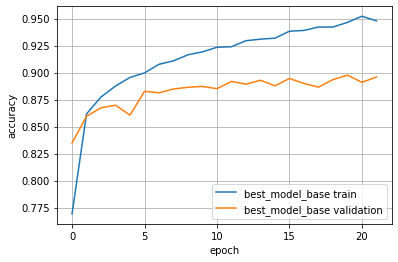

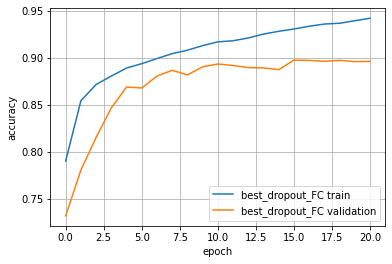

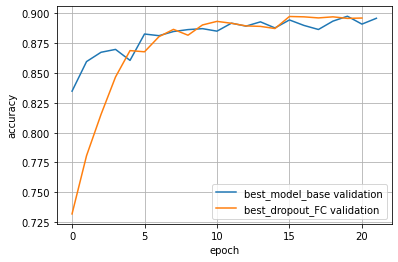

In [34]:
# Visualizing the learning curves on both models:

plt.plot(train_history.history['accuracy'], label = 'best_model_base train')
plt.plot(train_history.history['val_accuracy'], label = 'best_model_base validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history_2.history['accuracy'], label = 'best_dropout_FC train')
plt.plot(train_history_2.history['val_accuracy'], label = 'best_dropout_FC validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history.history['val_accuracy'], label = 'best_model_base validation')
plt.plot(train_history_2.history['val_accuracy'], label = 'best_dropout_FC validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### Comment:
- We can clearly see that application of the dropout on the second model prevents it from overfitting, which is not the case with the first one. 

- Especially, good to noticed with the first model is that after 11th epoch model looks stacked, is not learning anything more, everything after that point is overfitting, only the model becomes more complicated, is training to fit the training dataset but validation stays the same.  

- Finally, there is very small inprovement in accuracy between the two models wich is less that 1%. 

### Prediciton confidence:

For each instance, the best DNN model outputs class-probabilities 
1. remove the test instances for which the highest class-probability is lower than .99
2. we can say that those are instances for wich the model is not confindet 
3. how many test instances are left?
4. print a confusion matrix and classification report only for the instances for which the model is confident

1) best_model_base:

In [35]:
# Prediciton confidence for the best_model_base:

pc_m1 = load_model('/content/best_model_base.pt')

predictions = pc_m1.predict(X_test)

In [36]:
# Check the shape of predictions:

predictions.shape

(10000, 10)

In [37]:
# Choosing best 99% of the predictions:

best_99 = predictions[np.max(predictions, axis = 1) > 0.99]
y_test_99 = y_test[np.max(predictions, axis = 1) > 0.99]

In [38]:
# Check the shape of the best_99 and test_99:

best_99.shape, y_test_99.shape

((9477, 10), (9477,))

In [39]:
# Evaluating Prediction Confidence best_model_base:

print('=====Evaluation Prediction Confidence data=====')
print_classification_report(y_test_99, np.argmax(best_99, axis = 1), label_names)

=====Evaluation Prediction Confidence data=====
Confusion matrix
[[801   0   7  11   2   0  76   0   4   0]
 [  0 970   0   7   2   0   0   0   1   0]
 [ 14   0 767   5  78   0  52   0   0   0]
 [  5   5   3 844  24   0   6   0   4   0]
 [  0   1  68  25 802   0  53   0   3   0]
 [  0   0   0   1   0 951   0  30   1  12]
 [ 77   0  51  14  50   0 667   0   5   0]
 [  0   0   0   0   0   5   0 981   0  14]
 [  2   0   0   0   0   0   3   2 974   0]
 [  0   0   0   0   0   6   1  45   0 945]]

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.89      0.89       901
     Trouser       0.99      0.99      0.99       980
    Pullover       0.86      0.84      0.85       916
       Dress       0.93      0.95      0.94       891
        Coat       0.84      0.84      0.84       952
      Sandal       0.99      0.96      0.97       995
       Shirt       0.78      0.77      0.77       864
     Sneaker       0.93      0.98      0.95      1000
         Bag    

2) best_dropout_FC:

In [40]:
# Prediciton confidence for the best_dropout_FC:

pc_m2 = load_model('/content/best_dropout_FC.pt')

predictions2 = pc_m2.predict(X_test)

In [41]:
# Check the shape of predictions:

predictions2.shape

(10000, 10)

In [42]:
# Choosing best 99% of the predictions:

best_99_2 = predictions2[np.max(predictions2, axis = 1) > 0.99]
y_test_99_2 = y_test[np.max(predictions2, axis = 1) > 0.99]

In [43]:
# Check the shape of the best_99 and test_99:

best_99_2.shape, y_test_99_2.shape

((9852, 10), (9852,))

In [44]:
# Evaluating Prediction Confidence best_dropout_FC:

print('=====Evaluation Prediction Confidence data=====')
print_classification_report(y_test_99_2, np.argmax(best_99_2, axis = 1), label_names)

=====Evaluation Prediction Confidence data=====
Confusion matrix
[[862   1  11   9   2   1  84   0   4   0]
 [  3 969   0   9   3   0   1   0   0   0]
 [ 19   1 841  10  63   0  45   0   0   0]
 [ 31   5  11 873  33   0  20   0   2   0]
 [  0   0  83  20 821   0  65   0   0   0]
 [  0   0   0   0   0 952   0  26   1  19]
 [117   0  70  21  46   0 705   0   7   0]
 [  0   0   0   0   0   7   0 968   0  25]
 [  4   0   1   6   1   1   3   5 966   0]
 [  0   0   0   0   0   5   1  30   0 963]]

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86       974
     Trouser       0.99      0.98      0.99       985
    Pullover       0.83      0.86      0.84       979
       Dress       0.92      0.90      0.91       975
        Coat       0.85      0.83      0.84       989
      Sandal       0.99      0.95      0.97       998
       Shirt       0.76      0.73      0.75       966
     Sneaker       0.94      0.97      0.95      1000
         Bag    

## Best model

Try to create improved  model by changing some of the parameters ofyour best model
1. e.g., add batchnormzalization
2. increase/decrease dropout
3. change learning rate
4. change the optimizer

Best DNN model:


In [45]:
# Creating Best DNN model object:

def create_Best_DNN_model(input_shape, num_cells, output_shape):
  # drop_rate = 0.5

  _input = Input(input_shape)

  layer = BatchNormalization()(_input)

  layer = Dense(num_cells, activation = 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(0.2)(layer)

  layer = Dense(num_cells//2, activation = 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(0.5)(layer)

  layer = Dense(num_cells//4, activation = 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(0.3)(layer)

  _output = Dense(output_shape, activation = 'sigmoid')(layer)
  my_model = Model(inputs = [_input], outputs = [_output])
  my_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return my_model

input_shape  = (n_row*n_col)
num_cells = 1024
output_shape = len(np.unique(y_test))
model_best = create_Best_DNN_model(input_shape, num_cells, output_shape)
model_best.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048

In [46]:
# Setting the model:

path = 'best_dnn_model.pt'

# ModelCheckpoint monitoring:
callback_1 = ModelCheckpoint(path, monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Earlystopping monitoring:
callback_2 = EarlyStopping(patience = 10)

# Connecting both:
callback_list = [callback_1, callback_2]

In [47]:
# Training the model:

val_data = (X_test, y_test)

train_history_3 = model_best.fit(X_train, 
                                 y_train, 
                                 validation_data = val_data, 
                                 epochs = 50, 
                                 batch_size = 1000, 
                                 callbacks = callback_list) 

print('Training Finished')

Epoch 1/50
60/60 [==============================] - 13s 197ms/step - loss: 0.9446 - accuracy: 0.6961 - val_loss: 0.8322 - val_accuracy: 0.7605

Epoch 00001: val_accuracy improved from -inf to 0.76050, saving model to best_dnn_model.pt
INFO:tensorflow:Assets written to: best_dnn_model.pt/assets
Epoch 2/50
60/60 [==============================] - 12s 193ms/step - loss: 0.4161 - accuracy: 0.8504 - val_loss: 0.6618 - val_accuracy: 0.7916

Epoch 00002: val_accuracy improved from 0.76050 to 0.79160, saving model to best_dnn_model.pt
INFO:tensorflow:Assets written to: best_dnn_model.pt/assets
Epoch 3/50
60/60 [==============================] - 12s 193ms/step - loss: 0.3692 - accuracy: 0.8653 - val_loss: 0.4742 - val_accuracy: 0.8414

Epoch 00003: val_accuracy improved from 0.79160 to 0.84140, saving model to best_dnn_model.pt
INFO:tensorflow:Assets written to: best_dnn_model.pt/assets
Epoch 4/50
60/60 [==============================] - 11s 191ms/step - loss: 0.3367 - accuracy: 0.8739 - val_lo

In [48]:
# Load best_dnn_model.pt and use it on the test data:

from keras.models import load_model

# Loading the best model:
best_m3 = load_model('/content/best_dnn_model.pt')

In [49]:
# Predicting with the best model:

best_pred_3 = best_m3.predict(X_test)
best_pred_3 = np.argmax(best_pred_3, axis=1)

In [50]:
# Evaluating DNN with Dropout and BatchNormalization model:

print('=====Evaluation Best DNN Model Data=====')
print_classification_report(y_test, best_pred_3, label_names)

=====Evaluation Best DNN Model Data=====
Confusion matrix
[[850   2  15  40   7   2  78   0   6   0]
 [  4 976   1  13   2   0   3   0   1   0]
 [ 17   1 820  17  95   1  47   1   1   0]
 [ 14   3   6 940  20   0  13   0   4   0]
 [  1   0  79  40 841   0  39   0   0   0]
 [  0   0   0   1   0 974   0  14   0  11]
 [108   0  78  46  68   0 690   0  10   0]
 [  0   0   0   0   0  22   0 946   0  32]
 [  2   0   4   8   1   3   3   3 976   0]
 [  0   0   0   0   0   8   1  24   0 967]]

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.82      0.82      1000
       Dress       0.85      0.94      0.89      1000
        Coat       0.81      0.84      0.83      1000
      Sandal       0.96      0.97      0.97      1000
       Shirt       0.79      0.69      0.74      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.98

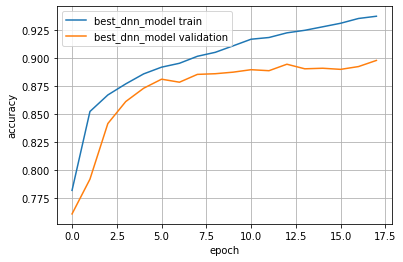

In [51]:
# Visualizing the learning curves on both models:

plt.plot(train_history_3.history['accuracy'], label = 'best_dnn_model train')
plt.plot(train_history_3.history['val_accuracy'], label = 'best_dnn_model validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Summary on Best Model:

- During the process of building the best DNN model were tried different approachest and settings in the designated space (batchnormzalization, dropout, learning rate and optimizer) however the accuracy of the model was not improved (0.90 was never overpassed), on the contrary, on most of the cases we received lower accuracy than 0.90 and on rest of it we just confirm already reached highest accuracy of 0.90.

Now, going step by step:

1) add batchnormzalization - was already applied and contributed in small improvement in the model accuracy.

2) increase/decrease dropout - different setting we tried with the dropout approach however once again improvement in accuracy was not achieved. But, dropout give un inside that with proper setting we can avoid overfitting of the model. 

3) change learning rate - now the learning rate also did not help in increasing accuracy but show sign that affects different areas of the model such as epochs and batch size. For example, with some learing rates we needed to increase the numbers of epochs in order to help model to converge (however this is not in our task requrement).

4) change the optimizer - here a lot of optimizers were applied such as: 

- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl

Also, we tried more deeper setting of the optimizers, here are some of the examples:

#### Setting for building best model: SGD approach
- from keras.optimizers import SGD
- epochs = 50
- lrate = 0.01
- decay = lrate/epochs
- sgd = SGD(lr = lrate, momentum = 0.9, decay = decay)

#### Setting for building best model: Adam approach
- import tensorflow as tf
- adam = tf.keras.optimizers.Adam(learning_rate = 0.1, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)

Overall, the accuracy of 0.90 was not improved, however there are still options that can be explored.